###### Exercise in Photogrammetry I
## **Ex.6 : Matching**

## A. Cross Correlation

We have given an image ```I``` of an text. We would like to find all the locations of the letter 'a' in this text.

**Tasks:**
1. Load the image ```'images/text.png'``` as an grayscale image and visualize it. Convert it for further computations to float values. (1 Point)
2. Extract the letter 'a' from the image at ```I(13:22,66:75)```. The resulting patch should be of size *(9x9)*. Visualize it and print out the shape. (1 Point)
3. Write a function ```imageCorrelation(image,patch)``` which computes the correlation between an image and a patch. Compute the correlation values only for the pixels where the neighborhood is well defined. **Hint:** You can modify the function ```imageConv(...)``` from the last exercise for this. The kernel must not be flipped for the correlation.You have to normalize the kernel and the neighborhood so that both are standard normal distributed: $N_{ij} \in N(0,1), w_{ij}\in N(0,1)$. (5 Points)

4. Compute the correlation for the given image and the extracted patch. Visualize the result. (1 Point)
5. Search and mark the maxima in the correlation image. A maxima is each pixel over 80% of the global maxima. (2 Points)
6. Why are only 3 of 5 a's detected. Write your answer in a markdown cell. (1 Points)
7. How can you also detect the other 2 a's. Implement your idea and show that you can find all a's. (4 Points)

In [1]:
# import all required modules
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib notebook

image shape, row:  361 , col:  231


<IPython.core.display.Javascript object>


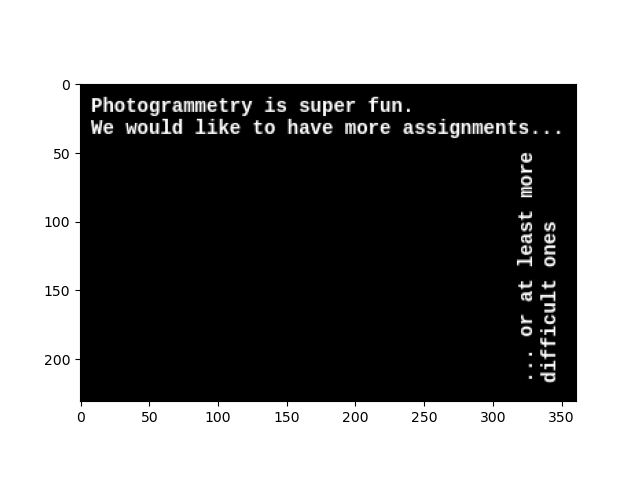

In [64]:
# Visualize
image = plt.imread("./images/text.png")
image = image[:, :, 1]
print("image shape, row: ", image.shape[1], ", col: ", image.shape[0])

plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

In [54]:
# to float value
image = image.astype(np.float64)

print("image dtype: ", image.dtype)

image dtype:  float64


template shape, row:  9 , col:  9


<IPython.core.display.Javascript object>


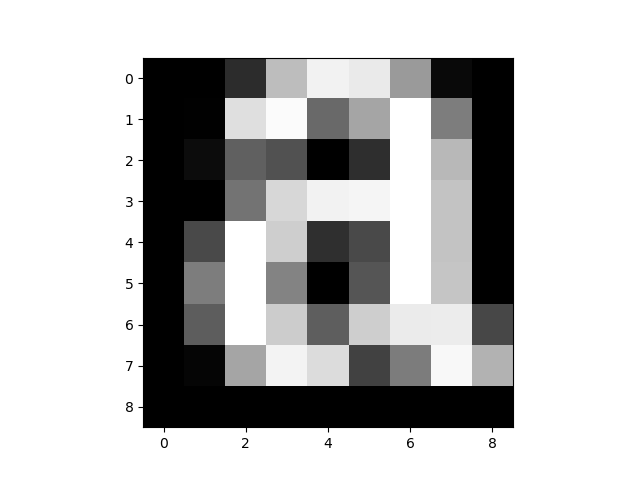

In [55]:
# Extract letter 'a'
letter_a = image[13:22, 66:75]
print("template shape, row: ", letter_a.shape[0], ", col: ", letter_a.shape[1])

plt.figure()
plt.imshow(letter_a, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


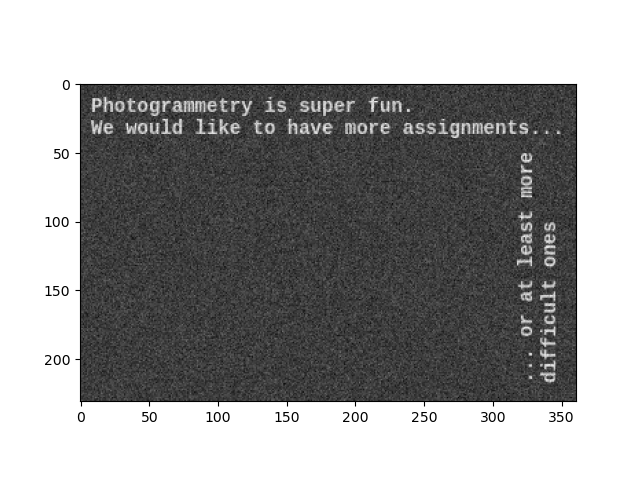

In [65]:
# Add Gaussian Noise
mu = 0.0;
std = 0.1
image_ = np.zeros((image.shape[0], image.shape[1]))
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        image_[y, x] = image[y, x] + np.random.normal(mu, std)
        
image_ = (image_ - np.min(image_)) / (np.max(image_) - np.min(image_))

plt.figure()
plt.imshow(image_, cmap='gray')
plt.show()

In [57]:
import math

def imageCorrelation(image, patch):
    """ Image Correlation

    Args:
        image (numpy.array, shape = (col_i, row_i)): Original image.
        patch (numpy.array, shpae = (col_p, row_p)): template.

    Returns:
        correlation_image (numpy.array, shape = (col_i - col_p + 1, row_i - row_p + 1)).
    """
    col_i = image.shape[0]
    row_i = image.shape[1]
    
    col_p = patch.shape[0]
    row_p = patch.shape[1]
    
    correlation_image = np.zeros((col_i - col_p + 1, row_i - row_p + 1), np.float64)
    
    patch_std = cal_std(patch)
    
    for y in range(col_i - col_p + 1):
        for x in range(row_i - row_p + 1):
            image_ = image[y:y+col_p, x:x+row_p]
            correlation_image[y, x] = cal_correlatoin_std(image_, patch) / (cal_std(image_) * patch_std)       
    
    return correlation_image
    
def cal_std(image):
    """Calculate Standard Deviation for images
    
    Args:
        image (numpy.array, shape = (col, row))
        
    Returns:
        std (float): standard deviation
    """
    
    col = image.shape[0]
    row = image.shape[1]
    
    mean_ = np.mean(image)
    sum_ = 0
    for y in range(col):
        for x in range(row):
            sum_ = sum_ + math.pow((image[y, x] - mean_), 2)
            
    std = sum_ / (col * row - 1)
    
    return math.sqrt(std)

def cal_correlatoin_std(image_1, image_2):
    """Calculate cross correlatoin Standard Deviation for images
    
    Args:
        image_1 (numpy.array, shape = (col, row))
        image_2 (numpy.array, shape = (col, row))
        
        
    Returns:
        std (float): standard deviation
    """
    
    col = image_1.shape[0]
    row = image_1.shape[1]
    
    mean_1 = np.mean(image_1)
    mean_2 = np.mean(image_2)
    sum_ = 0
    for y in range(col):
        for x in range(row):
            sum_ = sum_ + ((image_1[y, x] - mean_1) * (image_2[y, x] - mean_2))
            
    std = sum_ / (col * row - 1)
    
    return std

<IPython.core.display.Javascript object>


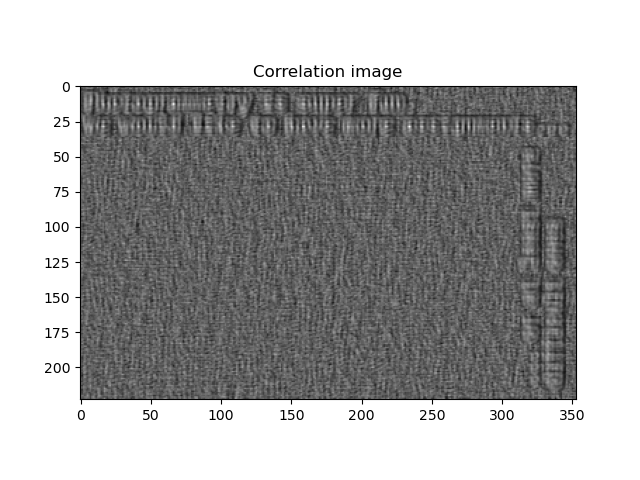

In [77]:
# Compute Correlation & Visualize
correlation_image = imageCorrelation(image_, letter_a)

plt.figure()
plt.imshow(correlation_image, cmap='gray')
plt.title("Correlation image")
plt.show()

[13 29 29 29] [ 66 158 159 234]


<IPython.core.display.Javascript object>


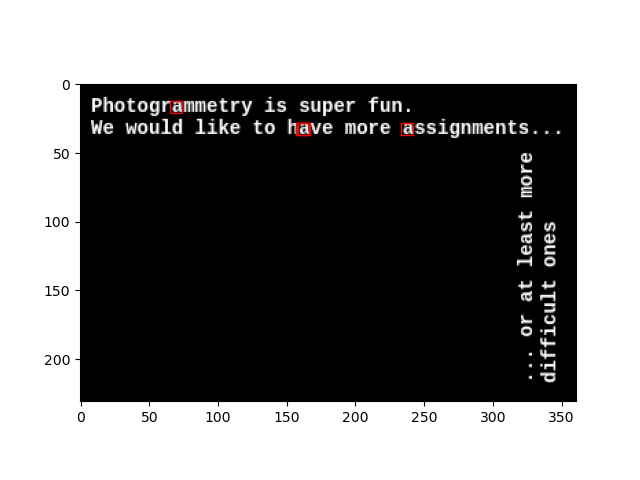

In [89]:
# Search Maxima
from matplotlib.patches import Rectangle

max_ = np.max(correlation_image)

col_, row_ = np.where(correlation_image > max_ * 0.8)

print(col_, row_)

visual_image = np.zeros((image.shape[0], image.shape[1], 3))
visual_image[:, :, 0] = image
visual_image[:, :, 1] = image
visual_image[:, :, 2] = image

plt.figure()
plt.imshow(visual_image)
ax = plt.gca()

for i in range(col_.shape[0]):
    rect = Rectangle((row_[i]-1, col_[i]-1), 9, 9, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

- Why we found 3 'a's
: Because only translation was considered.

<IPython.core.display.Javascript object>


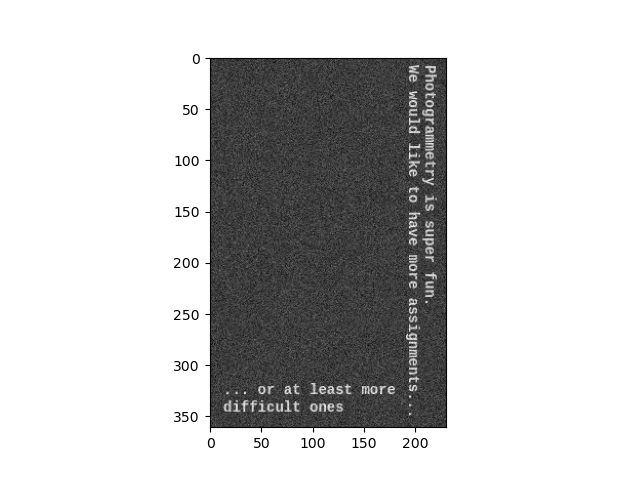

In [80]:
# Find the remaining two 'a's

rot_image_ = np.rot90(np.rot90(np.rot90(image_)))
plt.figure()
plt.imshow(rot_image_, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


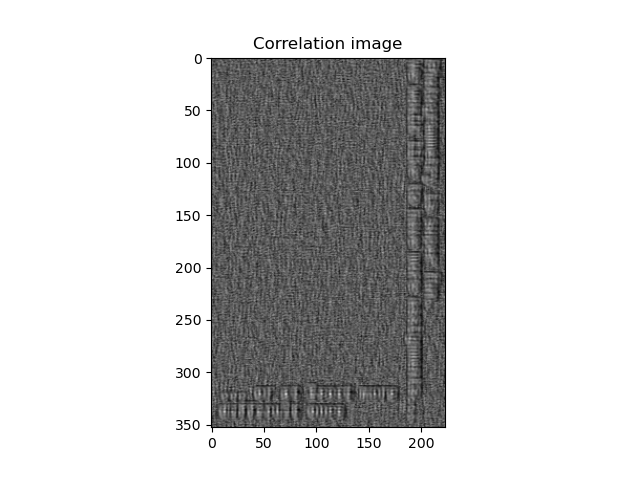

In [81]:
# Compute Correlation & Visualize
correlation_rot_image = imageCorrelation(rot_image_, letter_a)

plt.figure()
plt.imshow(correlation_rot_image, cmap='gray')
plt.title("Correlation image")
plt.show()

[321 321] [ 71 113]


<IPython.core.display.Javascript object>


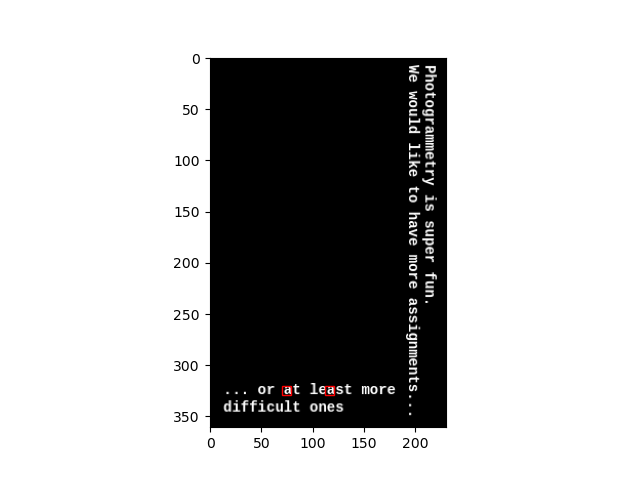

In [93]:
# Search Maxima
max_ = np.max(correlation_rot_image)

rot_image = np.rot90(np.rot90(np.rot90(image)))

col_rot, row_rot = np.where(correlation_rot_image > max_ * 0.8)

print(col_rot, row_rot)

visual_rot_image = np.zeros((rot_image.shape[0], rot_image.shape[1], 3))
visual_rot_image[:, :, 0] = rot_image
visual_rot_image[:, :, 1] = rot_image
visual_rot_image[:, :, 2] = rot_image

plt.figure()
plt.imshow(visual_rot_image)
ax = plt.gca()

for i in range(col_rot.shape[0]):
    rect = Rectangle((row_rot[i]-1, col_rot[i]-1), 9, 9, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()